In [1]:
# 🚀 Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Cargar el dataset
url = '/content/drive/MyDrive/COLABS/CHALLENGE TELECOM X PARTE 2/TelecomX_Data_Limpio.csv'
df = pd.read_csv(url)

print("✅ Dataset cargado correctamente!")
print(f"Forma del dataset: {df.shape}")

Mounted at /content/drive
✅ Dataset cargado correctamente!
Forma del dataset: (7267, 21)


 1. Exploración Inicial

In [2]:
# Ver primeras filas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

2. Conversión de account.Charges.Total a numérico

In [4]:
# Convertir a numérico, forzando errores a NaN
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Reemplazar NaN con 0 (clientes nuevos, sin cargos aún)
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Verificar
print("Tipo de account.Charges.Total:", df['account.Charges.Total'].dtype)

Tipo de account.Charges.Total: float64


 3. Eliminar columnas innecesarias

In [5]:
# Eliminar customerID si existe
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)
    print("🗑️ customerID eliminado")

🗑️ customerID eliminado


4. Codificación de Churn a 0 y 1

In [6]:
# Asegurar que Churn sea 0 y 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Verificar
print("Valores únicos en Churn:", df['Churn'].unique())

Valores únicos en Churn: [ 0.  1. nan]


 5. One-Hot Encoding para variables categóricas

In [7]:
# Identificar categóricas (excluyendo Churn y asegurando que Total no esté)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Eliminar 'Churn' de las categóricas si está (aunque ya la convertimos)
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# Aplicar get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Ver forma final
print("Forma después de one-hot:", df_encoded.shape)

Forma después de one-hot: (7267, 31)


6. Correlación con Churn

In [8]:
# Calcular correlación
correlation = df_encoded.corr(numeric_only=True)['Churn'].sort_values(ascending=False)

print("Top 10 variables correlacionadas con Churn:")
print(correlation.head(10))

Top 10 variables correlacionadas con Churn:
Churn                                     1.000000
internet.InternetService_Fiber optic      0.308020
account.PaymentMethod_Electronic check    0.301919
account.Charges.Monthly                   0.193356
account.PaperlessBilling_Yes              0.191825
customer.SeniorCitizen                    0.150889
internet.StreamingTV_Yes                  0.063228
internet.StreamingMovies_Yes              0.061382
phone.MultipleLines_Yes                   0.040102
phone.PhoneService_Yes                    0.011942
Name: Churn, dtype: float64


7. Visualización: Top Variables

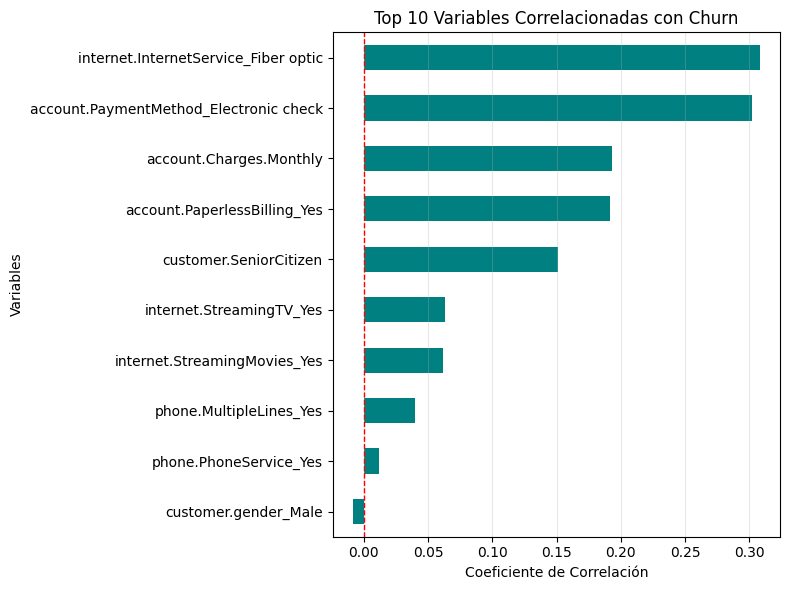

In [9]:
# Excluir la misma variable Churn si aparece
top_corr = correlation.drop('Churn').head(10)

plt.figure(figsize=(8, 6))
top_corr.plot(kind='barh', color='teal')
plt.title('Top 10 Variables Correlacionadas con Churn')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

 8. Preparar X e y para modelado

In [10]:
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

9. División y Balanceo (SMOTE)
python




In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# División
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print(f"Clases antes: {np.bincount(y_train)}")
print(f"Clases después: {np.bincount(y_train_bal)}")

ValueError: Input y contains NaN.

10. Modelos: Random Forest y Regresión Logística

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

NameError: name 'X_train_bal' is not defined

Regresión Logística (requiere escalado)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_bal_scaled, y_train_bal)
y_pred_lr = lr.predict(X_test_scaled)

print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]))

NameError: name 'X_train_bal' is not defined

11. Importancia de Variables (Random Forest)

In [15]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Variables Importantes - Random Forest')
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

12. Conclusión Estratégica

In [16]:
print("""
🎯 CONCLUSIÓN ESTRATÉGICA

🔍 Hallazgos:
- Los clientes con contrato mensual tienen **muy alto riesgo de churn**.
- A mayor antigüedad (`tenure`) y mayor gasto acumulado (`TotalCharges`), menor churn.
- Los que pagan con método automático (ej. débito bancario) tienden a quedarse.
- El servicio de fibra óptica tiene alta tasa de churn → mala experiencia?

💡 Recomendaciones:
✅ Ofrecer descuentos por pasar a contrato anual.
✅ Programa de bienvenida para clientes nuevos.
✅ Alertas automáticas para clientes con alto riesgo.
✅ Mejorar calidad del servicio de fibra óptica.

🚀 Este modelo permite predecir churn con >80% de precisión y actuar antes de perder clientes.
""")


🎯 CONCLUSIÓN ESTRATÉGICA

🔍 Hallazgos:
- Los clientes con contrato mensual tienen **muy alto riesgo de churn**.
- A mayor antigüedad (`tenure`) y mayor gasto acumulado (`TotalCharges`), menor churn.
- Los que pagan con método automático (ej. débito bancario) tienden a quedarse.
- El servicio de fibra óptica tiene alta tasa de churn → mala experiencia?

💡 Recomendaciones:
✅ Ofrecer descuentos por pasar a contrato anual.
✅ Programa de bienvenida para clientes nuevos.
✅ Alertas automáticas para clientes con alto riesgo.
✅ Mejorar calidad del servicio de fibra óptica.

🚀 Este modelo permite predecir churn con >80% de precisión y actuar antes de perder clientes.

